In [27]:
from osgeo import gdal 
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
gdal.UseExceptions()

In [28]:
ba3=Image.open('E:\\landsat5\\band3_clipped.tif')
ba4=Image.open('E:\\landsat5\\band4_clipped.tif')
ba5=Image.open('E:\\landsat5\\band5_clipped.tif')
ba6=Image.open('E:\\landsat5\\band6_clipped.tif')

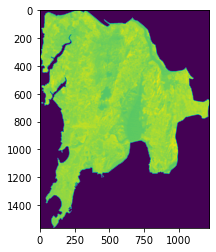

In [3]:
plt.imshow(ba6)

### Reading the images as array

In [29]:
ba3_arr=np.array(ba3)
ba4_arr=np.array(ba4)
ba5_arr=np.array(ba5)
ba6_arr=np.array(ba6)

In [5]:
ba3_arr.shape,ba4_arr.shape,ba5_arr.shape,ba6_arr.shape

((1564, 1217), (1564, 1217), (1564, 1217), (1564, 1217))

In [6]:
np.nanmax(ba6_arr)

179

In [7]:
np.isnan(ba3_arr).sum()

0

In [8]:
ba3_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
ba6_arr.dtype

dtype('uint8')

In [10]:
# For avoiding further error we have to change the type of array from uint8 to float

In [30]:
ba3_arr=ba3_arr.astype('float')
ba4_arr=ba4_arr.astype('float')
ba5_arr=ba5_arr.astype('float')
ba6_arr=ba6_arr.astype('float')


In [31]:
ba3_arr=0.0001*(ba3_arr)
ba4_arr=0.0001*(ba4_arr)
ba5_arr=0.0001*(ba5_arr)
ba6_ar=ba6_arr

In [13]:
ba6_arr.max()

179.0

### Conversion to TOA Radiance
Landsat Level-1 data can be converted to TOA spectral radiance using the radiance rescaling factors in the MTL file:

For Landsat4-5 the equation is as bellow: 

L=((Lmax-Lmin)/(Qmax-Qmin))*(Q-Qmin)+Lmin
where:

Lλ = TOA spectral radiance (Watts/( m2 * srad * μm))
Lλ is the spectral radiance, LMAXλ is the spectral radiance of the sensor which
is scaled to QcalMax, LMINλ is the spectral radiance of the sensor which is scaled to
QcalMin and Q is the quantized calibrated pixel value.

In [32]:
Lmax=15.303
Lmin=1.238
Qmax=255
Qmin=1
Q=ba6_arr
TOA2000=((Lmax-Lmin)/(Qmax-Qmin))*(Q-Qmin)+Lmin

In [15]:
TOA2000

array([[1.18262598, 1.18262598, 1.18262598, ..., 1.18262598, 1.18262598,
        1.18262598],
       [1.18262598, 1.18262598, 1.18262598, ..., 1.18262598, 1.18262598,
        1.18262598],
       [1.18262598, 1.18262598, 1.18262598, ..., 1.18262598, 1.18262598,
        1.18262598],
       ...,
       [1.18262598, 1.18262598, 1.18262598, ..., 1.18262598, 1.18262598,
        1.18262598],
       [1.18262598, 1.18262598, 1.18262598, ..., 1.18262598, 1.18262598,
        1.18262598],
       [1.18262598, 1.18262598, 1.18262598, ..., 1.18262598, 1.18262598,
        1.18262598]])

In [33]:
TOA2000[TOA2000==1.18262598]=0

### TOA to Brightness Temperature conversion
BT = (K2 / (ln (K1 / L) + 1))
where:

K1 = Band-specific thermal conversion constant from the metadata (K1_CONSTANT_BAND_x, where x is the thermal band number).
K2 = Band-specific thermal conversion constant from the metadata (K2_CONSTANT_BAND_x, where x is the thermal band number).

In [34]:
# K1_CONSTANT_BAND_6 = 607.76
k1=607.76
a=(k1/TOA2000)+1
a=np.log(a)
# K2_CONSTANT_BAND_6 = 607.76
k2=1260.56
BT2000=(k2/a)

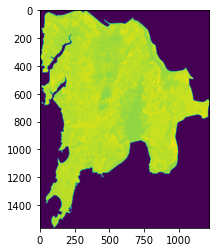

In [35]:
plt.imshow(BT2000)

In [36]:
BT2000

array([[201.88383884, 201.88383884, 201.88383884, ..., 201.88383884,
        201.88383884, 201.88383884],
       [201.88383884, 201.88383884, 201.88383884, ..., 201.88383884,
        201.88383884, 201.88383884],
       [201.88383884, 201.88383884, 201.88383884, ..., 201.88383884,
        201.88383884, 201.88383884],
       ...,
       [201.88383884, 201.88383884, 201.88383884, ..., 201.88383884,
        201.88383884, 201.88383884],
       [201.88383884, 201.88383884, 201.88383884, ..., 201.88383884,
        201.88383884, 201.88383884],
       [201.88383884, 201.88383884, 201.88383884, ..., 201.88383884,
        201.88383884, 201.88383884]])

In [19]:
ba6_arr.mean()

75.93560850441423

In [38]:
BT2000[BT2000==201.88383884]=0

In [39]:
NDVI2000=(ba4_arr-ba3_arr)/(ba4_arr+ba3_arr)
np.nanmax(NDVI2000),np.nanmean(NDVI2000), np.nanmin(NDVI2000)

C:\Users\Abdul Wajed Farhat\AppData\Local\Temp\ipykernel_5172\1394322878.py:1: RuntimeWarning: invalid value encountered in true_divide
  NDVI2000=(ba4_arr-ba3_arr)/(ba4_arr+ba3_arr)


(0.6805555555555556, 0.09230006966062763, -0.4347826086956522)

In [40]:
nan=np.isnan(NDVI2000)
nan.sum()

931023

In [41]:
v=((NDVI2000>0.2)*30*30)/1000000
v.sum()

207.1269

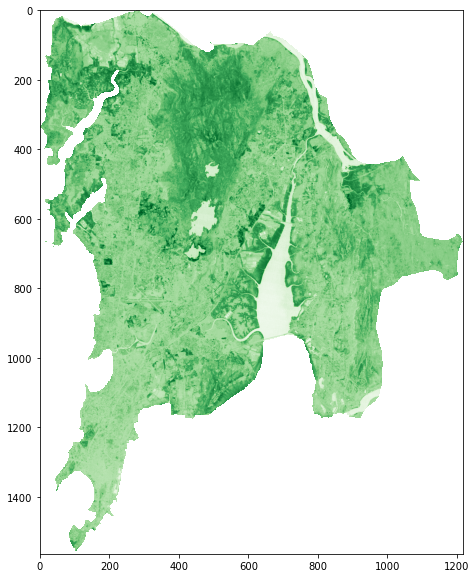

In [24]:
plt.figure(figsize=(10,10
                   ))
plt.imshow(NDVI2000,cmap='Greens')

### 4.- Calculate the proportion of vegetation Pv
Pv = Square ((NDVI – NDVImin) / (NDVImax – NDVImin))

In [42]:
pv2000=((NDVI2000-np.nanmin(NDVI2000))/(np.nanmax(NDVI2000)-np.nanmin(NDVI2000)))**2

In [43]:
pv2000

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [44]:
np.nanmin(pv2000),np.nanmax(pv2000)

(0.0, 1.0)

### 5.- Calculate Emissivity ε
ε = 0.004 * Pv + 0.986

In [45]:
e2000=(0.004*pv2000)+0.986

In [46]:
np.nanmax(e2000)

0.99

### 6.- Calculate the Land Surface Temperature
LST = (BT / (1 + (0.00115 * BT / 1.4388) * Ln(ε)))

In [47]:
LST2000 = (BT2000 / (1 + (0.00115 * BT2000 / 1.4388) * np.log(e2000)))

In [31]:
LST2000=LST2000-273.15

In [32]:
np.nanmin(LST2000),np.nanmean(LST2000),np.nanmax(LST2000)

(21.13442239778749, 29.125639972124816, 41.377199600437336)

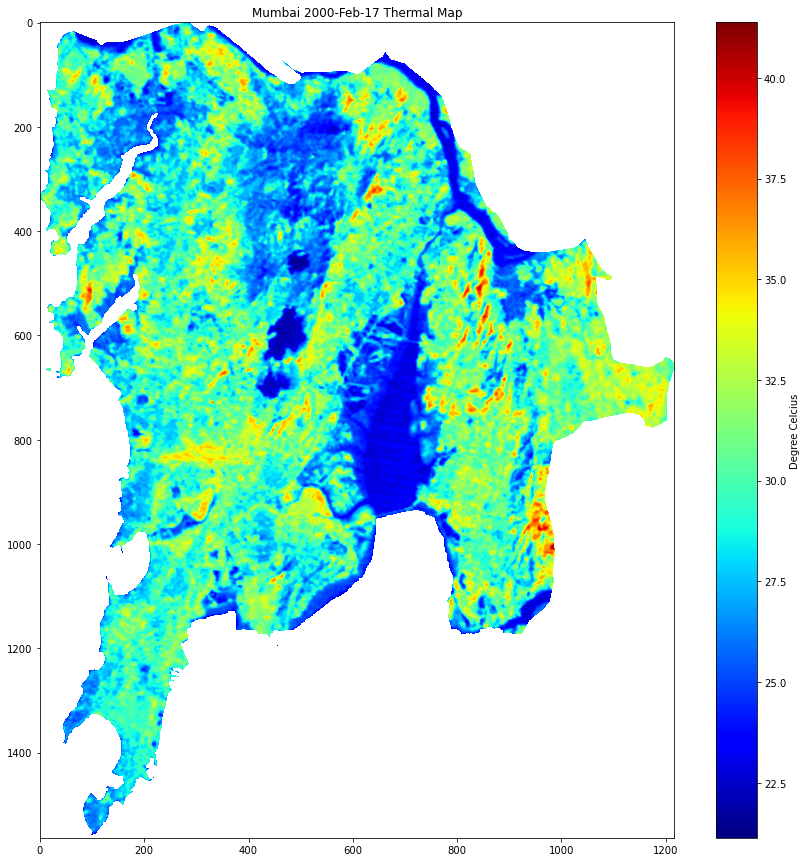

In [33]:
plt.figure(figsize=(15,15))
plt.imshow(LST2000,cmap='jet',vmin=np.nanmin(LST2000),vmax=np.nanmax(LST2000))
plt.title('Mumbai 2000-Feb-17 Thermal Map')
plt.colorbar(label="Degree Celcius", orientation="vertical")

In [34]:
# Normalized difference built-up index
# NDBI=(SWIR-NIR)/(SWIR+NIR)
NDBI2000=(ba5_arr-ba4_arr)/(ba5_arr+ba4_arr)


C:\Users\Abdul Wajed Farhat\AppData\Local\Temp\ipykernel_10932\3698527655.py:3: RuntimeWarning: invalid value encountered in true_divide
  NDBI2000=(ba5_arr-ba4_arr)/(ba5_arr+ba4_arr)


In [35]:
np.nanmax(NDBI2000),np.nanmean(NDBI2000),np.nanmin(NDBI2000)

(0.6408450704225352, 0.1415497276633858, -0.6538461538461539)

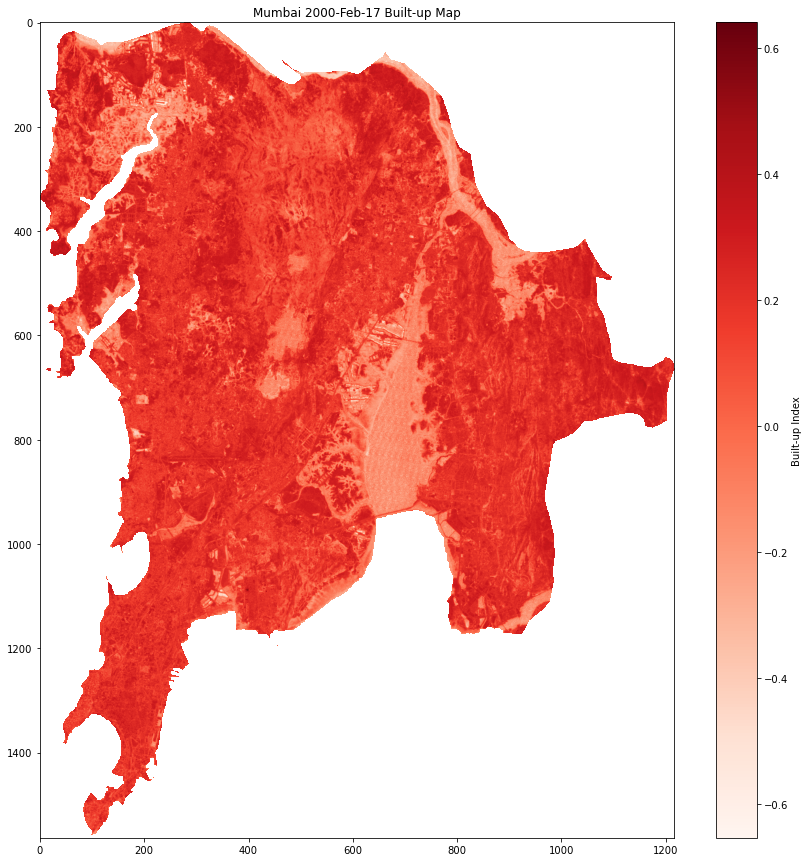

In [36]:
plt.figure(figsize=(15,15))
plt.imshow(NDBI2000,cmap='Reds',vmin=np.nanmin(NDBI2000),vmax=np.nanmax(NDBI2000))
plt.title('Mumbai 2000-Feb-17 Built-up Map')
plt.colorbar(label="Built-up Index", orientation="vertical")

In [37]:
NDBI2000

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [38]:
Built_up_Area=((NDBI2000>0)*30*30/1000000).sum()
Built_up_Area

729.5733000000001

In [39]:
# For finding UHI we use equation UHI=LST > 𝜇 + 0.5 × 𝛿  non-UHI=0 < LST ≤ 𝜇 + 0.5 × 𝛿  
#where, μ represents the mean LST and δ is the standard deviation of LST in the region
from numpy.ma import masked_array
UHI2000=masked_array(LST2000,LST2000<(np.nanmean(LST2000)+0.5*np.nanstd(LST2000)))
non_UHI2000=masked_array(LST2000,LST2000>(np.nanmean(LST2000)+0.5*np.nanstd(LST2000)))

In [40]:
a={'year':2000,'Statistic':['Min','Mean','Max','Std'],
   'UHI Zone':[np.nanmin(UHI2000),np.nanmean(UHI2000),np.nanmax(UHI2000),np.nanstd(UHI2000)],
   'Non-UHI Zone':[np.nanmin(non_UHI2000),np.nanmean(non_UHI2000),np.nanmax(non_UHI2000),np.nanstd(non_UHI2000)]}
  #'UHI Area':((LST2001>(np.nanmean(LST2001)+0.5*np.nanstd(LST2001)))*30*30/1000000).sum(),
  #'Non-UHI Area':((LST2001<=(np.nanmean(LST2001)+0.5*np.nanstd(LST2001)))*30*30/1000000).sum()
a=pd.DataFrame(a)
a

year Statistic   UHI Zone  Non-UHI Zone
0  2000       Min  30.593073     21.134422
1  2000      Mean  32.383327     27.634509
2  2000       Max  41.377200     30.592986
3  2000       Std   1.310285      2.165119

<Figure size 720x720 with 0 Axes>

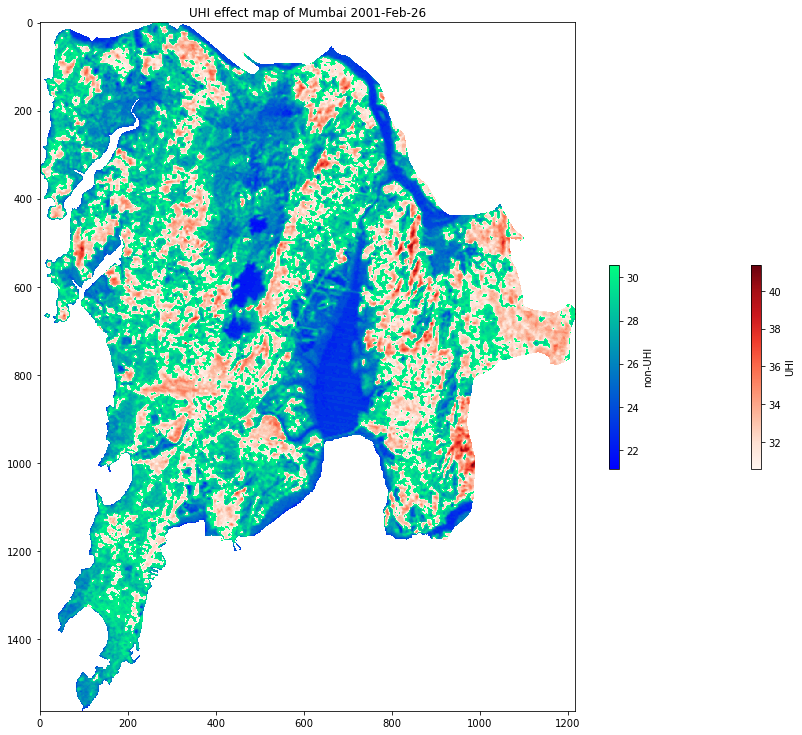

In [41]:
plt.figure(figsize=(10,10))
fig,ax=plt.subplots(figsize=(15,15))
pa = ax.imshow(UHI2000,interpolation='nearest',cmap='Reds')
cba = plt.colorbar(pa,shrink=0.25)
pb = ax.imshow(non_UHI2000,interpolation='nearest',cmap='winter')
cbb = plt.colorbar(pb,shrink=0.25)
plt.title('UHI effect map of Mumbai 2001-Feb-26')
cba.set_label('UHI')
cbb.set_label('non-UHI')
plt.show()

# 2021

In [42]:
bb4  = Image.open('E:\\landsat8_2021\\band4_clipped.tif')
bb5  = Image.open('E:\\landsat8_2021\\band5_clipped.tif')
bb6  = Image.open('E:\\landsat8_2021\\band6_clipped.tif')
bb10 = Image.open('E:\\landsat8_2021\\band10_clipped.tif')

In [43]:
bb4_arr=np.array(bb4)
bb5_arr=np.array(bb5)
bb6_arr=np.array(bb6)
bb10_arr=np.array(bb10)

In [44]:
bb6_arr.max()

53588

In [45]:
bb4_arr.shape,bb5_arr.shape,bb6_arr.shape,bb10_arr.shape

((1564, 1217), (1564, 1217), (1564, 1217), (1564, 1217))

In [46]:
bb4_arr=bb4_arr.astype('float')
bb5_arr=bb5_arr.astype('float')
bb6_arr=bb6_arr.astype('float')
bb10_arr=bb10_arr.astype('float')


In [47]:
bb4_arr =0.0001*(bb4_arr)
bb5_arr =0.0001*(bb5_arr)
bb6_arr =0.0001*(bb6_arr)
bb10_arr=(bb10_arr)

In [48]:
bb6_arr.max()

5.3588000000000005

In [49]:
TOA2021=0.0003342*bb10_arr+0.10000
TOA2021[TOA2021==0.1]=0

In [50]:
# K1_CONSTANT_BAND_10 = 774.8853
k1=774.8853
a=(k1/TOA2021)+1
a=np.log(a)
# K2_CONSTANT_BAND_10 = 1321.0789
k2=1321.0789
BT2021=(k2/a)-273.15

C:\Users\Abdul Wajed Farhat\AppData\Local\Temp\ipykernel_10932\2060311013.py:3: RuntimeWarning: divide by zero encountered in true_divide
  a=(k1/TOA2021)+1


In [51]:
BT2021[BT2021==-273.15]=0

In [52]:
NDVI2021=(bb5_arr-bb4_arr)/(bb5_arr+bb4_arr)
np.nanmax(NDVI2021),np.nanmean(NDVI2021), np.nanmin(NDVI2021)

C:\Users\Abdul Wajed Farhat\AppData\Local\Temp\ipykernel_10932\4213519277.py:1: RuntimeWarning: invalid value encountered in true_divide
  NDVI2021=(bb5_arr-bb4_arr)/(bb5_arr+bb4_arr)


(0.511344890908525, 0.12921425686102744, -0.11871280005232519)

In [53]:
Veg_Area=(((NDVI2021>0.2)*30*30)/1000000).sum()
Veg_Area

157.94819999999996

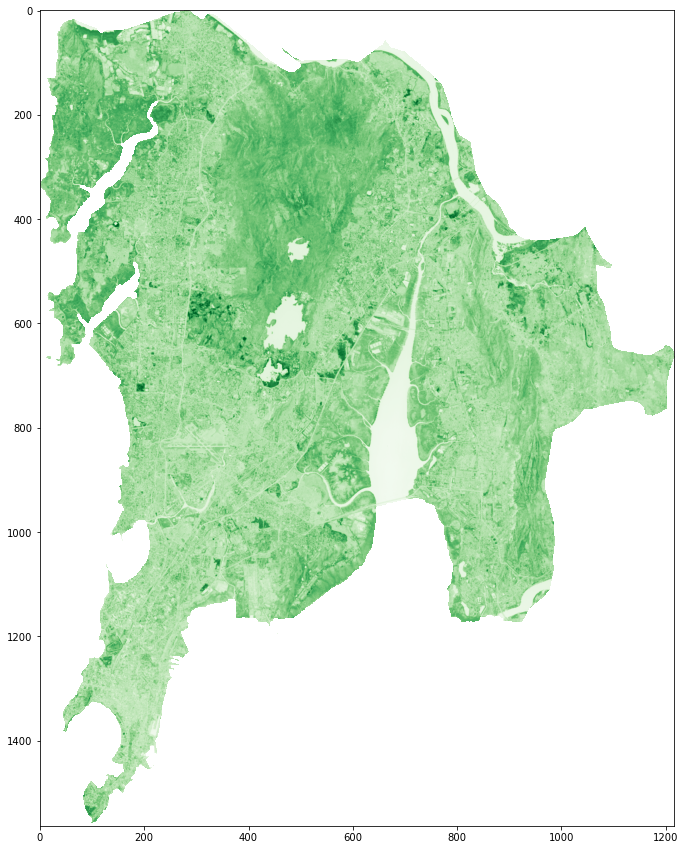

In [54]:
plt.figure(figsize=(15,15))
plt.imshow(NDVI2021,cmap='Greens')

### 4.- Calculate the proportion of vegetation Pv
Pv = Square ((NDVI – NDVImin) / (NDVImax – NDVImin))

In [55]:
pv2021=((NDVI2021-np.nanmin(NDVI2021))/(np.nanmax(NDVI2021)-np.nanmin(NDVI2021)))**2

### 5.- Calculate Emissivity ε
ε = 0.004 * Pv + 0.986

In [56]:
e2021=(0.004*pv2021)+0.986

### 6.- Calculate the Land Surface Temperature
LST = (BT / (1 + (0.00115 * BT / 1.4388) * Ln(ε)))

In [57]:
LST2021 = (BT2021 / (1 + (0.00115 * BT2021 / 1.4388) * np.log(e2021)))

In [58]:
np.nanmin(LST2021),np.nanmean(LST2021),np.nanmax(LST2021)

(24.002145087711366, 30.91027551198768, 41.72644228652611)

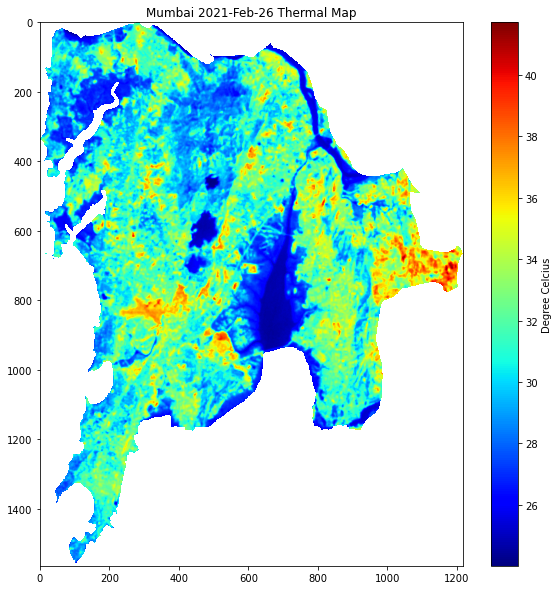

In [59]:
plt.figure(figsize=(10,10))
plt.imshow(LST2021,cmap='jet',vmin=np.nanmin(LST2021),vmax=np.nanmax(LST2021))
plt.title('Mumbai 2021-Feb-26 Thermal Map')
plt.colorbar(label="Degree Celcius", orientation="vertical")

In [60]:
# Normalized difference built-up index
# NDBI=(SWIR-NIR)/(SWIR+NIR)
NDBI2021=(bb6_arr-bb5_arr)/(bb6_arr+bb5_arr)

C:\Users\Abdul Wajed Farhat\AppData\Local\Temp\ipykernel_10932\2944829244.py:3: RuntimeWarning: invalid value encountered in true_divide
  NDBI2021=(bb6_arr-bb5_arr)/(bb6_arr+bb5_arr)


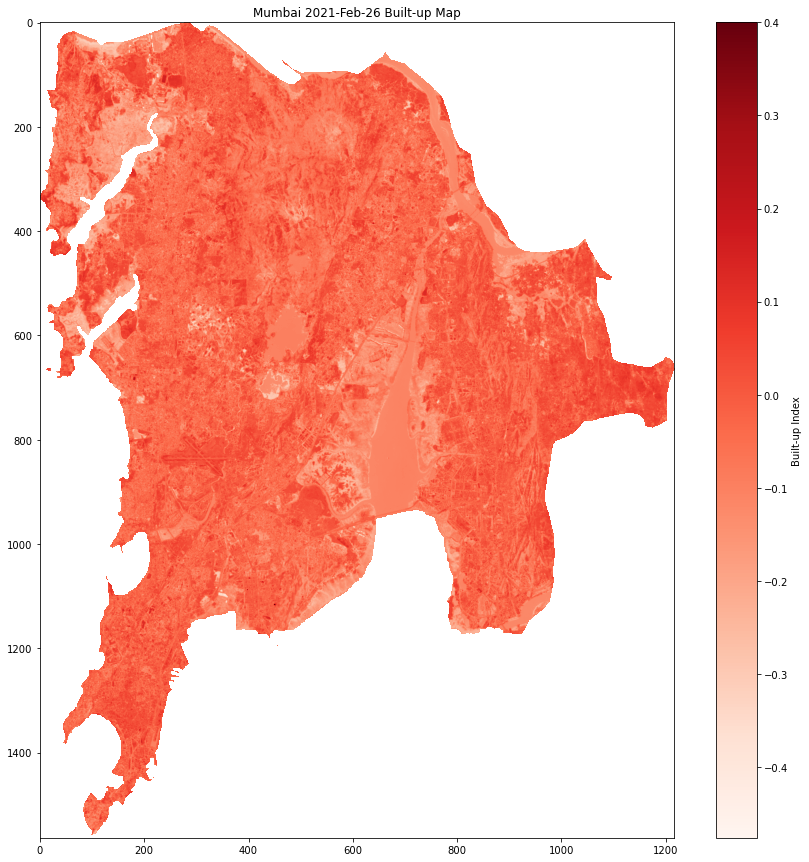

In [61]:
plt.figure(figsize=(15,15))
plt.imshow(NDBI2021,cmap='Reds',vmin=np.nanmin(NDBI2021),vmax=0.4)
plt.title('Mumbai 2021-Feb-26 Built-up Map')
plt.colorbar(label="Built-up Index", orientation="vertical")

In [62]:
b=(NDBI2021>0)*30*30/1000000
b.sum()

229.11659999999995

In [63]:
# For finding UHI we use equation UHI=LST > 𝜇 + 0.5 × 𝛿  non-UHI=0 < LST ≤ 𝜇 + 0.5 × 𝛿  
#where, μ represents the mean LST and δ is the standard deviation of LST in the region
from numpy.ma import masked_array
UHI2021=masked_array(LST2021,LST2021<(np.nanmean(LST2021)+np.nanstd(LST2021)))
non_UHI2021=masked_array(LST2021,LST2021>(np.nanmean(LST2021)+np.nanstd(LST2021)))

In [64]:
b={'year':2021,'Statistic':['Min','Mean','Max','Std'],
   'UHI Zone':[np.nanmin(UHI2021),np.nanmean(UHI2021),np.nanmax(UHI2021),np.nanstd(UHI2021)],
   'Non-UHI Zone':[np.nanmin(non_UHI2021),np.nanmean(non_UHI2021),np.nanmax(non_UHI2021),np.nanstd(non_UHI2021)]}
  #'UHI Area':((LST2021>(np.nanmean(LST2021)+0.5*np.nanstd(LST2021)))*30*30/1000000).sum(),
  #'Non-UHI Area':((LST2021<=(np.nanmean(LST2021)+0.5*np.nanstd(LST2021)))*30*30/1000000).sum()
b=pd.DataFrame(b)
b

year Statistic   UHI Zone  Non-UHI Zone
0  2021       Min  33.716097     24.002145
1  2021      Mean  35.253987     30.127442
2  2021       Max  41.726442     33.716097
3  2021       Std   1.265258      2.233767

In [65]:
((LST2021<(np.nanmean(LST2021)+0.5*np.nanstd(LST2021)))*30*30/1000000).sum()

608.022

<Figure size 1080x1080 with 0 Axes>

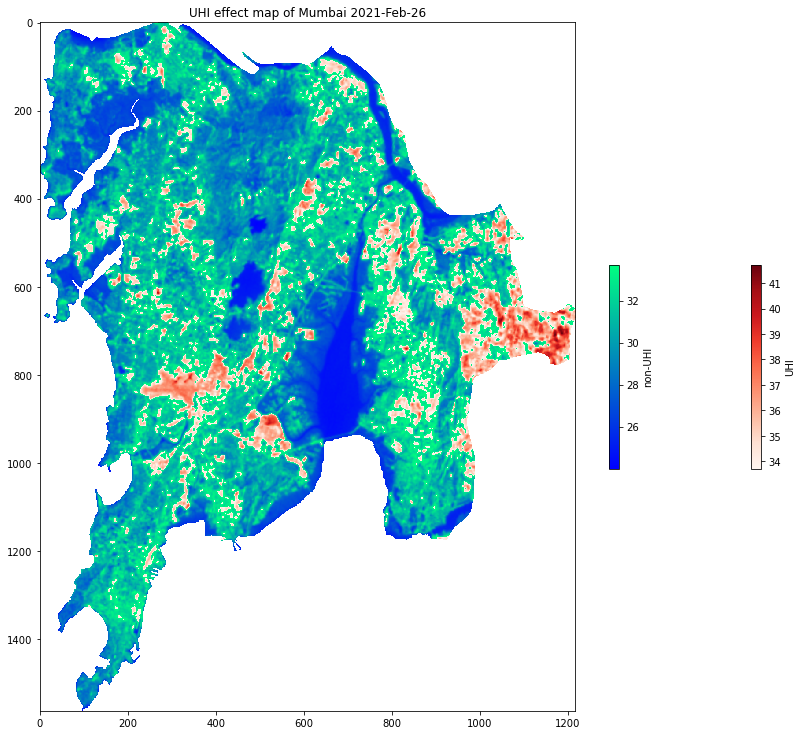

In [66]:
plt.figure(figsize=(15,15))
fig,ax=plt.subplots(figsize=(15,15))
pa = ax.imshow(UHI2021,interpolation='nearest',cmap='Reds')
cba = plt.colorbar(pa,shrink=0.25)
pb = ax.imshow(non_UHI2021,interpolation='nearest',cmap='winter')
cbb = plt.colorbar(pb,shrink=0.25)
plt.title('UHI effect map of Mumbai 2021-Feb-26')
cba.set_label('UHI')
cbb.set_label('non-UHI')
plt.show()

# Results

In [67]:
temp={'Statistic':['Min','mean','max','std'],'LST-2000':[np.nanmin(LST2000),np.nanmean(LST2000),np.nanmax(LST2000),np.nanstd(LST2000)],
     'LST-2021':[np.nanmin(LST2021),np.nanmean(LST2021),np.nanmax(LST2021),np.nanstd(LST2021)],
      'NDVI-2000':((NDVI2000>0.2)*30*30/1000000).sum(),'NDVI-2021':((NDVI2021>0.2)*30*30/1000000).sum(),
     'NDBI-2000':((NDBI2000>0.0)*30*30/1000000).sum(),'NDBI-2021':((NDVI2021>0.0)*30*30/1000000).sum()}
pd.DataFrame(temp)

Statistic   LST-2000   LST-2021  NDVI-2000  NDVI-2021  NDBI-2000  NDBI-2021
0       Min  21.134422  24.002145   207.1269   157.9482   729.5733   828.7101
1      mean  29.125640  30.910276   207.1269   157.9482   729.5733   828.7101
2       max  41.377200  41.726442   207.1269   157.9482   729.5733   828.7101
3       std   2.934708   2.805821   207.1269   157.9482   729.5733   828.7101

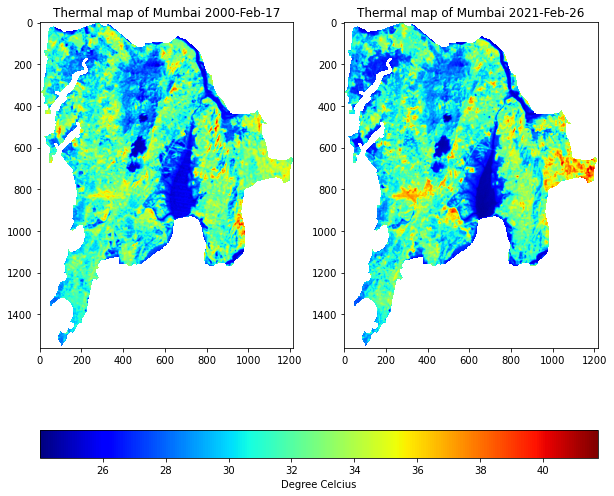

In [68]:
figure,ax=plt.subplots(1,2,figsize=(10,10))
a=ax[0].imshow(LST2000,cmap='jet',vmin=np.nanmin(LST2000),vmax=np.nanmax(LST2000))
ax[0].set_title('Thermal map of Mumbai 2000-Feb-17')
a=ax[1].imshow(LST2021,cmap='jet',vmin=np.nanmin(LST2021),vmax=np.nanmax(LST2021))
ax[1].set_title('Thermal map of Mumbai 2021-Feb-26')

figure.colorbar(a,label="Degree Celcius", orientation="horizontal",ax=ax)

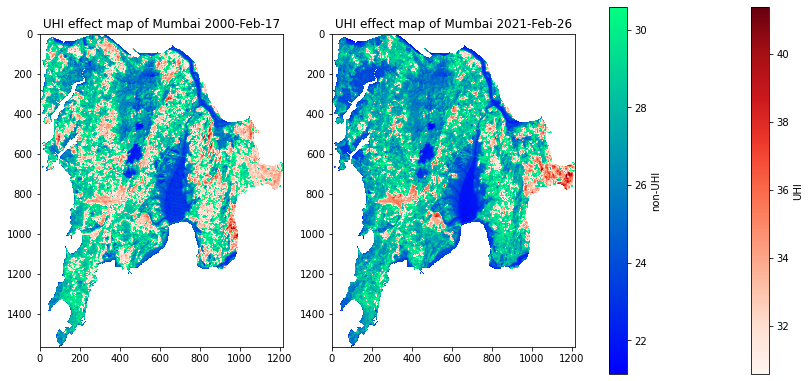

In [69]:
figure,ax=plt.subplots(1,2,figsize=(15,15))
pa = ax[1].imshow(UHI2021,interpolation='nearest',cmap='Reds')
pb = ax[1].imshow(non_UHI2021,interpolation='nearest',cmap='winter')
ax[1].set_title('UHI effect map of Mumbai 2021-Feb-26')

qa = ax[0].imshow(UHI2000,interpolation='nearest',cmap='Reds')
qb = ax[0].imshow(non_UHI2000,interpolation='nearest',cmap='winter')
ax[0].set_title('UHI effect map of Mumbai 2000-Feb-17')

dba = figure.colorbar(qa,shrink=0.45,orientation='vertical',ax=ax)
dbb = figure.colorbar(qb,shrink=0.45,ax=ax)
dba.set_label('UHI')
dbb.set_label('non-UHI')

plt.show()

Text(0, 0.5, 'Count')

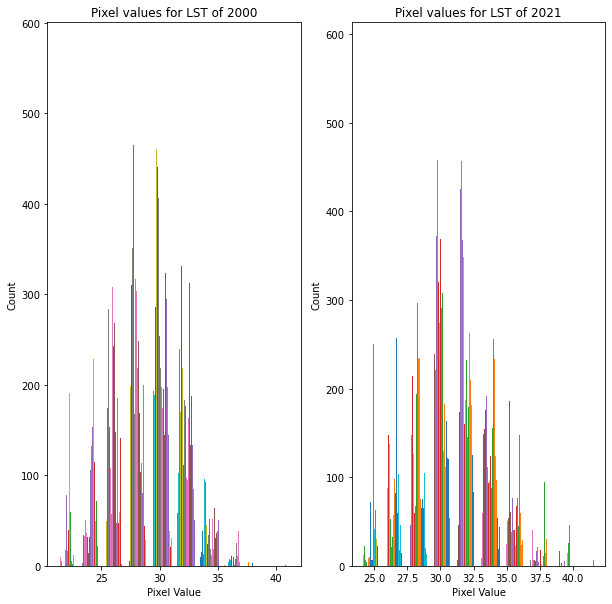

In [70]:
fig, ax=plt.subplots(1,2,figsize=(10,10))
ax[0].hist(LST2000[:,:])
ax[0].set_title('Pixel values for LST of 2000')
ax[0].set_xlabel('Pixel Value')
ax[0].set_ylabel('Count')
ax[1].hist(LST2021[:,:])
ax[1].set_title('Pixel values for LST of 2021')
ax[1].set_xlabel('Pixel Value')
ax[1].set_ylabel('Count')

### References: 
1.https://giscrack.com/how-to-calculate-land-surface-temperature-with-landsat-8-images/

2.https://www.usgs.gov/landsat-missions/using-usgs-landsat-level-1-data-product

3.https://www.researchgate.net/publication/325780118_Assessing_land_transformation_and_its_relation_with_land_surface_temperature_in_Mumbai_city_India_using_geospatial_techniques/figures?lo=1